Markdown cell


In [2]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import typing

# changing theme
plt.style.use('dark_background')
dpi = 200

# Please comment out the above line in order to view the plots in light mode, also on a low resource system kindly reduce the dpi in plots for ease.

In [3]:
def normalised_histogram(img:np.ndarray) -> np.ndarray:
    """Returns the normalised histogram given
    a numpy array"""
    pmf = np.zeros(256)
    img = img.flatten()
    np.add.at(pmf, img, 1)
    pmf /= img.shape[0]
    return pmf


def entropy(pmf: np.ndarray) -> float:
    """Returns the entropy of the given pmf 

    The formula used is : -sum p(x) log p(x)

    Example
    --------
    >>> p = np.array([0.5, 0.5])
    >>> entropy(p)
    1.0
    """
    pmf[pmf==0] = 1e-8
    return -np.sum(pmf*np.log2(pmf))

def KL_divergence(p: np.ndarray, q: np.ndarray) -> float:
    """This function returns the KL divergence between the two given pmfs
    
    The formula used is : sum p(x) log p(x)/q(x) 
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> KL_divergence(p, q)
    0.029446844526784283
    """
    q[q==0] = 1e-8
    p[p==0] = 1e-8
    return np.sum(p * np.log2(p/q)) 

def cross_entropy(p: np.ndarray, q:np.ndarray) -> float:
    """This function returns the cross entropy betwen the two given pmfs
    
    The formula used is : H(p) + D(p||q)
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> cross_entropy(p, q)
    1.0294468445267844
    """
    return entropy(p)+KL_divergence(p, q)

def JS_divergence(p: np.ndarray, q:np.ndarray) -> float:
    """This function return the Jenson Shannon divergence between
    the given two pmfs
    
    The formula used is : D(p||m)+D(q||m), where
    m = (p+q)/2
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> JS_divergence(p, q)
    0.014598313520947925
    """
    m = (p+q)/2
    return KL_divergence(p, m) + KL_divergence(q, m)

def checkValidTuple(pmf : np.ndarray, rx: np.ndarray, sy: np.ndarray, tolerance: float = 1e-6) -> bool:
    """This function returns wether or not the given tuple of pmf, marginals
    is valid

    Optional Argument
    -----------------
    Tolerance: There can be error calculating probabilities, it might be worth adding a tolerance which
    is sort of a measure of how much error can be accomodated.
    
    Condition used
    --------------
    sum_over(i) p_ij = s
    
    sum_over(j) p_ij = r
    
    Example
    -------
    >>> rx = np.array([0.5, 0.25, 0.125, 0.125])
    >>> sy = np.array([0.25, 0.25, 0.25, 0.25])
    >>> ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])
    >>> checkValidTuple(ValidPmf, rx, sy)
    True
    >>> InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
    >>> checkValidTuple(InvalidPmf, rx, sy)
    False
    """
    rx_calc = np.sum(pmf, axis=1)
    sy_calc = np.sum(pmf, axis=0)
    
    if np.linalg.norm(rx_calc-rx)<tolerance:
        if np.linalg.norm(sy_calc-sy)<tolerance:
            return True
    return False



The cross entropy of the joint histogram of the stereo images is 7.273398651495821


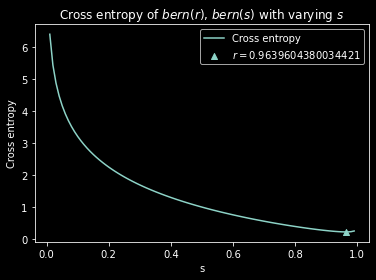

In [4]:
# PART - A

left = (mpimg.imread('left.png').flatten()*255).astype(int)
right = (mpimg.imread('right.png').flatten()*255).astype(int)

left_pmf = normalised_histogram(left)
right_pmf = normalised_histogram(right)
# print(left_pmf)
ce = cross_entropy(left_pmf, right_pmf)
print("The cross entropy of the joint histogram",
    "of the stereo images is {}".format(ce))

r = np.random.rand()
pmf1 = np.array([r,1-r])
s = np.linspace(0,1,100,endpoint=False)[1:]
pmf2 = np.array([s,1-s]).T
ce = [cross_entropy(pmf1,pmf) for pmf in pmf2]

fig, ax = plt.subplots(1,1)
ax.plot(s,ce, label='Cross entropy')
ax.scatter(r,ce[int(100*r)],marker='^', label='$r = {}$'.format(r))
ax.legend()
ax.set_title("Cross entropy of $bern(r)$, $bern(s)$ with varying $s$")
ax.set_xlabel("s")
ax.set_ylabel("Cross entropy")
plt.show()



It is clear from the above plot that the minimum is achieved when $r=s$

In [5]:
# PART - B
print("The JS divergence of normalised histograms of",
"left and right stereo images is", JS_divergence(left_pmf, right_pmf),
"\nIt is easy to see that this is symmetric because the JS divergence",
"obtained after reversing the order is also the same",
"which is", JS_divergence(right_pmf, left_pmf))

print("\n\nWhile the KL divergence is not symmetric",
"D(p||q) = {}".format(KL_divergence(left_pmf,right_pmf)),
"while D(q||p) = {}".format(KL_divergence(right_pmf,left_pmf)),
"where p represents the joint histogram of left images, while q",
"represents the joint histogram of right image")


The JS divergence of normalised histograms of left and right stereo images is 0.00734607953862966 
It is easy to see that this is symmetric because the JS divergence obtained after reversing the order is also the same which is 0.00734607953862966


While the KL divergence is not symmetric D(p||q) = 0.015104015237387055 while D(q||p) = 0.014409785833354484 where p represents the joint histogram of left images, while q represents the joint histogram of right image


In [6]:
# PART - C
#
# I've written two examples, one valid, other not, the example is from the 
# joint pmf taken in class
# for the invalid pmf, I just switched two entries to make 
# one of the marginals different.

ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])

InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
rx = np.array([0.5, 0.25, 0.125, 0.125])
sy = np.array([0.25, 0.25, 0.25, 0.25])
print(checkValidTuple(ValidPmf, rx, sy))  # returns True
print(checkValidTuple(InvalidPmf, rx, sy)) # returns False

True
False


# Question-2
## Part-a
### i) What is the crowding problem?
Crowding problem refers to the problem when we are not able to reproduce the distances from higher dimensional space to lower dimensional space. Consider the case of a regular tetrahedron in three dimensions, it is not possible to have four points in two dimensions which are equidistant from one another. In case of SNE, the cost of representing data points which are close in higher dimensions as far apart in lower dimension is high, which can be seen in this plot (taken from the paper).         
![make sure you have downloaded the image](gradient_sne.png )

### ii) How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?
Student t-distribution is heavy tailed, it allows moderatly dissimilar points to be placed somewhat apart, it can be seen in below image.       
![make sure you have downloaded the image](gradient_tsne.png )      
t-SNE allows these points to be placed far apart, unlike in sne which has some attractive forces between moderately dissimilar datapoints, which would cause the points to collapse at a point, but in case of t-SNE, the points cannot collapse because of the repulsive forces.

### iii) What other important changes have been made in t-SNE relative to SNE?
In t-SNE, the pmf matrix has been made symmetric
$\begin{align}
p_{ij} = \frac{p_{i|j}+p_{j|i}}{2n}
\end{align}$        
where $p_{i|j}$ is calculated in the same way as in SNE, we made the pmf symmetric, this is done so that each data point can have significant impact on the gradient.       
Apart from this and introduction of student t distribution, it is important to note that the matrix $q$ is also symmetric.


### Part-b

In [7]:
dimensions = 10
mu1 = np.ones(dimensions)
mu2 = 10*mu1
cov = 0.01*np.eye(dimensions)
# mu = [1]*10, cov = 0.01 I
cluster1 = np.random.multivariate_normal(mu1,cov,10)
# mu = [10]*10, cov = 0.01 I
cluster2 = np.random.multivariate_normal(mu2,cov,10)
# stacking the two clusters in the same matrix
X = np.vstack((cluster1,cluster2))



class tsne:
    def __init__(self, X) -> None:
        self.X = X
        self.Y = None
    
    
    def calc_p_util(self) -> np.ndarray:
        """Calculates the p matrix"""
        (m, _) = self.X.shape

        s = 0.3*np.ones(m)        
        p = np.zeros( (m, m) )
        for i in range(m):
            denominator = -1
            for j in range(m):
                denominator += np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )
            
            for j in range(m):
                if j == i:
                    continue
                p[i,j] = np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )/denominator

        p = (p+p.T)/(2*m)
        return p

    def calc_q_util(self) -> np.ndarray:
        """Calculates the q matrix"""
        (m, _) = self.Y.shape         
        q = np.zeros((m,m))

        denominator = 0
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                denominator += 1/(1 + np.linalg.norm(self.Y[i]-self.Y[j])**2)
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                q[i,j] = (1/(1+ np.linalg.norm(self.Y[i]-self.Y[j])**2))/denominator
        return q

    def calc_gradient_util(self, learning_rate: float, p:np.ndarray, q:np.ndarray) -> np.ndarray:
        """Calculates the gradient"""
        (m,n) = self.Y.shape
        gradient = np.zeros((m,n))
        for i in range(m):
            for j in range(m):
                gradient[i]+=(p[i,j]-q[i,j])*(self.Y[i]-self.Y[j])/(1+np.linalg.norm(self.Y[i]-self.Y[j])**2)
        return gradient

    def process(self, T:int, momentum_decay_func: typing.Callable, learning_rate:float, dimensions:int, plot: bool = False, toprint=True) -> None:
        """It will print initial and final divergence
        after performing t-SNE"""
        (m,_) = self.X.shape
        mean = np.zeros(dimensions)
        cov = (1e-4)*np.eye(dimensions)
        
        self.Y = np.random.multivariate_normal(mean, cov, m)
        if plot:
            fig = plt.figure()
            ax = fig.subplots()
            ax.scatter( self.Y[:10,0],self.Y[:10,1], marker = '^', label = "class 1")
            ax.scatter( self.Y[10:,0],self.Y[10:,1], marker = 's', label = "class 2")
            ax.set_title("before t-SNE")
            ax.legend()
        p = self.calc_p_util()
        q = self.calc_q_util()
        if toprint:
            print("initial divergence:",KL_divergence(p.flatten(), q.flatten()))
        change = self.Y.copy()
        for t in range(T):
            gradient = self.calc_gradient_util(learning_rate,p ,q)
            new_change =  4*learning_rate*gradient + momentum_decay_func(t)*(change)
            self.Y -= new_change
            change = new_change
            q = self.calc_q_util()
        if toprint:
            print("final divergence:",KL_divergence(p, q))
        if plot:
            return ax

# momentum decay function
def alpha(t:int) -> float:
    return 0.99

I tried with momentum decay function as 
1. constant (0.99)
2. decaying function $\frac{1}{1+\frac{t}{50}}$

The constant function seems to give consistent result for randomised initialisation

I took $\sigma_i = 0.3$, the reason being, a higher $\sigma$ would mean that we are allowing more points to be considered in the neighbourhood of the given point, although our clusters are well separated, the probability of far off points being considered as close increases, we don't want that. We cannot take $\sigma$ to be too small either, the reason being the probabilities of nearby points would also start decreasing if we choose a very small $\sigma$.

initial divergence: 1.1269953786155398
final divergence: 0.021567686696272265


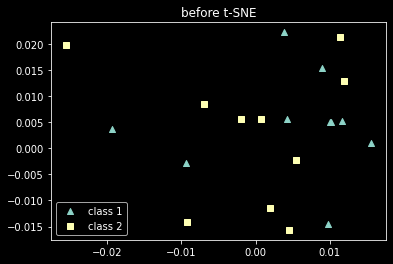

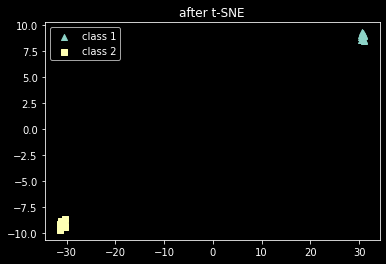

In [8]:
mytsne = tsne(X)
mytsne.process(50, alpha, 10,2, plot=True)

Y = mytsne.Y
fig = plt.figure()
ax = fig.subplots()
ax.scatter( Y[:10,0],Y[:10,1], marker = '^', label = "class 1")
ax.scatter( Y[10:,0],Y[10:,1], marker = 's', label = "class 2")
ax.legend()
ax.set_title("after t-SNE")
plt.show()

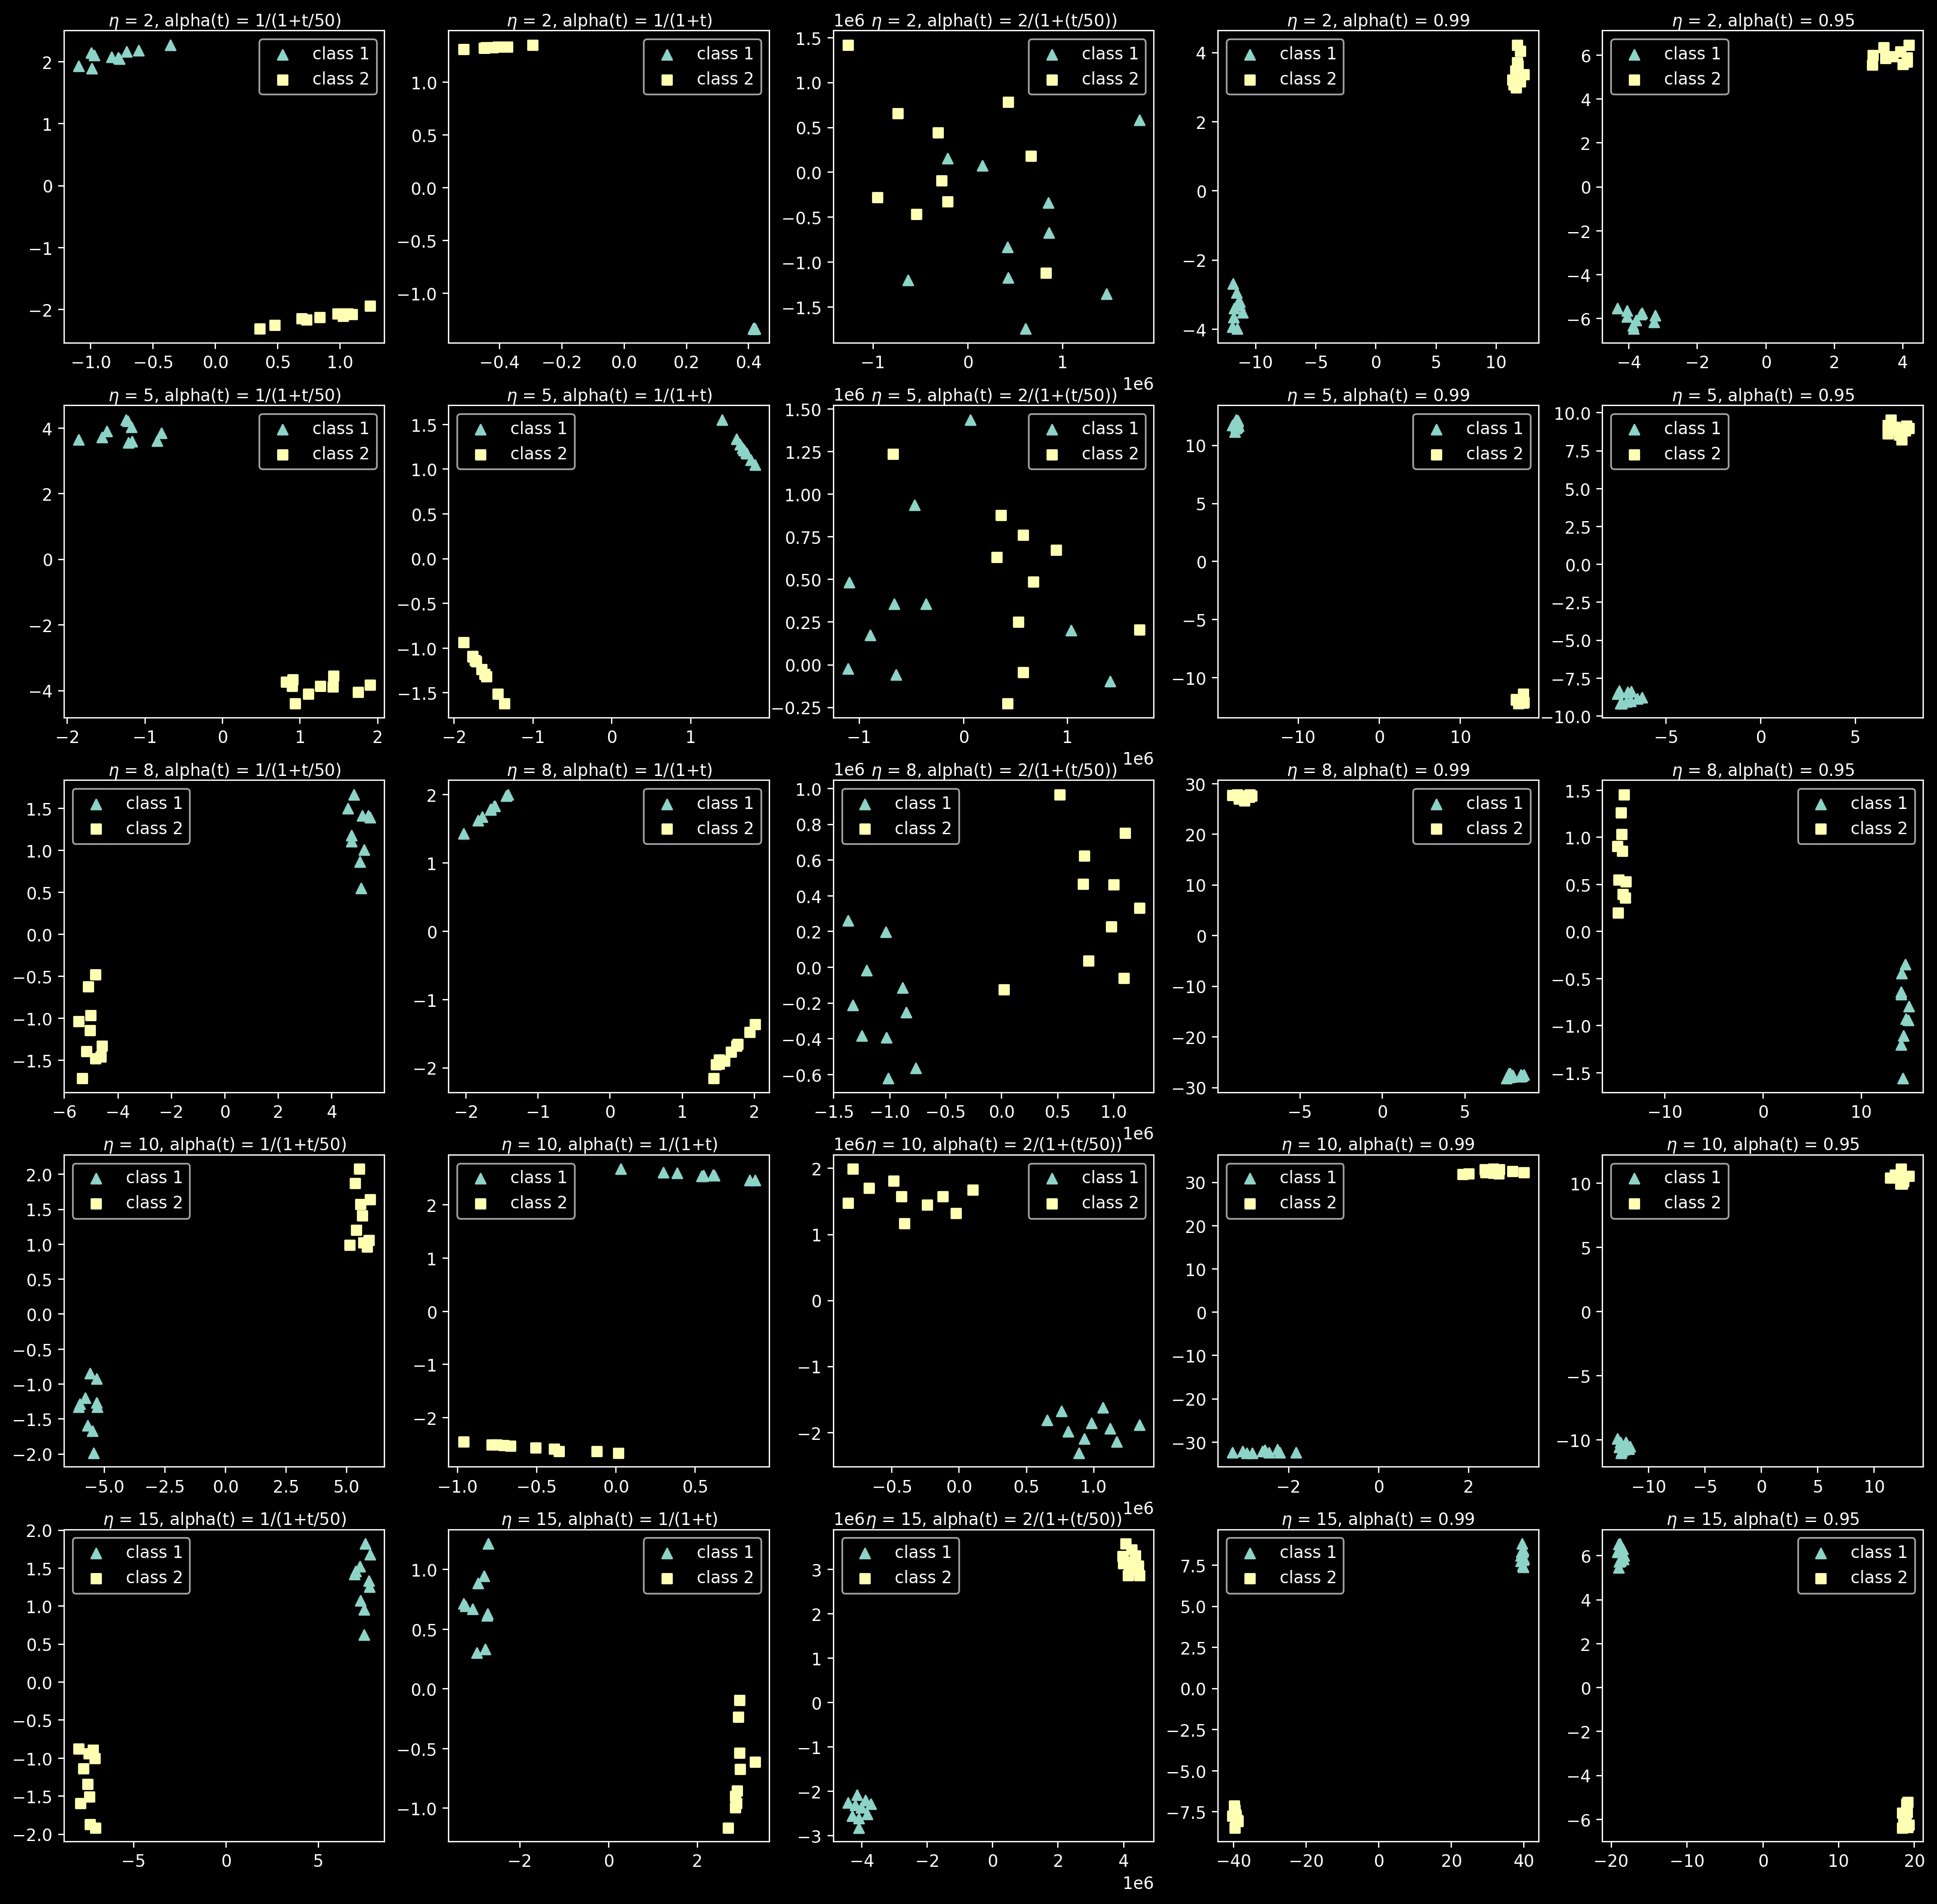

In [28]:
momentum_decay_funcs = [lambda t:1/(1+t/50), lambda t:1/(1+t), lambda t:2/(1+t/50), lambda t:0.99, lambda t:0.95]
momentum_title = ["1/(1+t/50)", "1/(1+t)",\
    "2/(1+(t/50))","0.99","0.95"]
learning_rates = [2,5,8,10,15]

fig = plt.figure(figsize = (20,20), dpi=dpi)
fig.tight_layout(pad=4.0)
ax = fig.subplots(5,5)

for i,eta in enumerate(learning_rates):
    for j,alpha in enumerate(momentum_decay_funcs):
        mytsne.process(50, alpha, eta ,2, plot=False, toprint=False) 
        Y = mytsne.Y
        ax[i][j].scatter( Y[:10,0],Y[:10,1], marker = '^', label = "class 1")
        ax[i][j].scatter( Y[10:,0],Y[10:,1], marker = 's', label = "class 2")
        ax[i][j].legend()
        ax[i][j].set_title("$\eta$ = {}, alpha(t) = {}".format(learning_rates[i], momentum_title[j]), pad=2, fontsize=10)
plt.show()




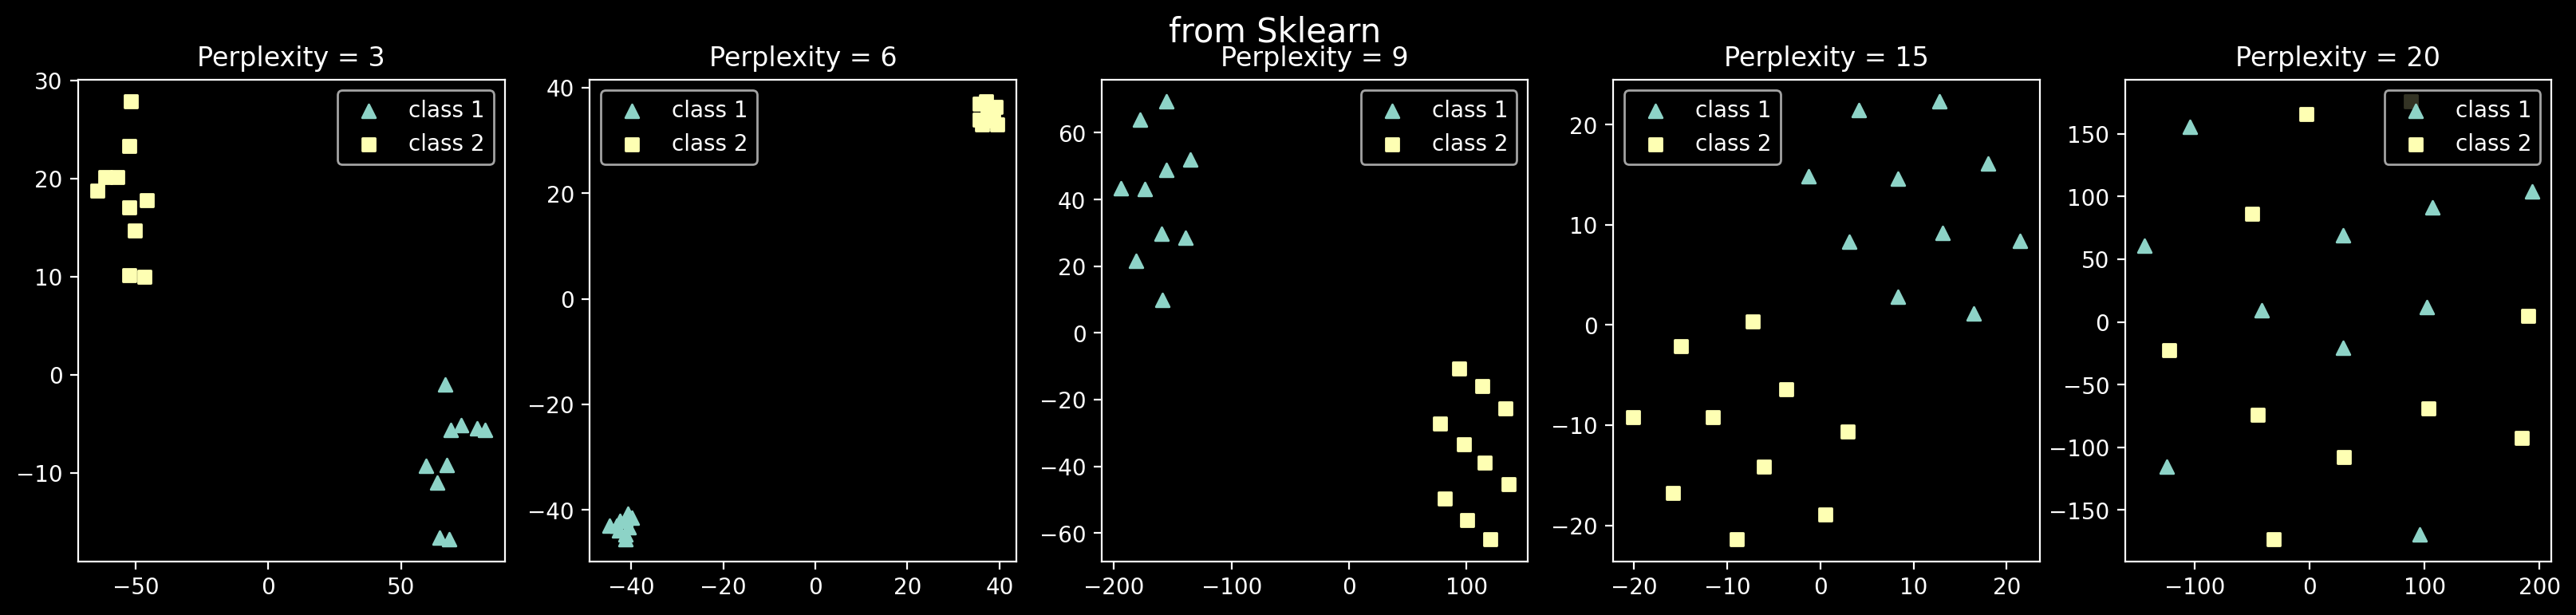

In [10]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(20,4), dpi=dpi)
fig.suptitle("from Sklearn", fontsize=15)
ax = fig.subplots(1,5)

for i,p in list(enumerate([3,6,9,15,20])):
    X_embedded = TSNE(n_components=2, learning_rate='auto',\
        init='random',perplexity=p).fit_transform(X)
    ax[i].scatter(X_embedded[:10,0],X_embedded[:10,1], marker='^', label = 'class 1')
    ax[i].scatter(X_embedded[10:,0],X_embedded[10:,1], marker='s', label = 'class 2')
    ax[i].set_title("Perplexity = {}".format(p))
    ax[i].legend()
plt.show()


From the above plot it is clear that perplexity should be less than 9, the reason being that perplexity is related to the number of neighbours, we should keep the value of sigma somewhat low like $0.3$, this is done so that the probability that a distant point is a neighbour of given point would be very less. We know that in gaussian distribution more than $97\%$ of the data points lie within two std. The clusters formed by using perplexity near $6$ are forming good clusters. 

# Question - 3

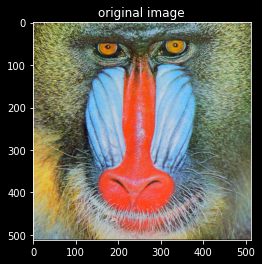

In [11]:
img = mpimg.imread('4.2.03.tiff')
plt.imshow(img)
plt.title("original image")
plt.show()

In [12]:
def correlation(img:np.ndarray, kernel:np.ndarray, reflection: bool = True) -> np.ndarray:
    """Returns a numpy array after performing
    correlation on given image using given kernel"""

    kernel_size = kernel.shape
    img_size = img.shape

    assert kernel_size.__len__() == 3, "the kernel should have 3 dimensions including channel"
    assert img_size.__len__() == 3, "the image should have 3 dimensions including channel"
    assert kernel_size[0] == kernel_size[1], "the kernel should have dimension k x k x c"
    assert kernel_size[0]>1, "the kernel can't be of size 1 x 1 x c"
    W,H,c = img_size
    k = kernel_size[0]

    horizontal_flipped = img[::-1,:,:]
    vertical_flipped = img[:,::-1,:]
    fully_flipped = img[::-1,::-1,:]

    pad = (k-1)//2
    padded_array = np.zeros((W+2*pad,H+2*pad,c))
    padded_array[pad:-pad,pad:-pad,:] = img.copy()
    if reflection:
        padded_array[:pad,:pad,:] = fully_flipped[-pad:,-pad:,:]
        padded_array[-pad:,-pad:,:] = fully_flipped[:pad,:pad,:]
        padded_array[:pad,-pad:,:] = fully_flipped[-pad:,:pad,:]
        padded_array[-pad:,:pad,:] = fully_flipped[:pad,-pad:,:]
        padded_array[:pad,pad:-pad,:] = horizontal_flipped[-pad:,:,:]
        padded_array[-pad:,pad:-pad,:] = horizontal_flipped[:pad,:,:]
        padded_array[pad:-pad,:pad] = vertical_flipped[:,-pad:]
        padded_array[pad:-pad,-pad:] = vertical_flipped[:,:pad]

    output = np.zeros((W,H))
    count = 0
    for i in range(W):
        for j in range(H):
            count +=1
            output[i,j] = np.sum(padded_array[i:i+k,j:j+k,:]*kernel)
    output -= np.min(output)
    output*=255.0/np.max(output)
    return output.astype(int)

def convolution(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
    """Returns a numpy array after performing
    convolution on given image using given kernel"""

    kernel = kernel[::-1,::-1,:]
    return correlation(img, kernel)


In [13]:
def kernel( name: str = 'box_blur', k : int = 3 ) -> np.ndarray:
    """
    Parameters
    ---------
    k : int
        size of kernel
    name : {'box_blur','identity','unsharp_mask','gaussian_blur','progressive','asymmetric_example'}
        'box_blur' : blurs the image
        'identity' : would return the same image
        'unsharp_mask' : unsharp mask filter
        'gaussian_blur' : gaussian blur filter
        'progressive; : progressive filter
        'asymmetric_example' : asymmetric filter
    Returns
    -------
    out : ndarray
        3 dimensional k x k x c numpy array
    """
    if name == 'box_blur':
        return np.ones((k,k,3))/(3*k**2)
    elif name == "identity":
        temp = np.zeros((k,k,3))
        temp[k//2,k//2,:] = 1
        return temp
    elif name == "unsharp_mask":
        temp = np.zeros((k,k))
        variance = ((k-1)/5.5)**2
        for i in range(k):
            for j in range(k):
                temp[i][j] = np.exp(-((i-k//2)**2+(j-k//2)**2)/(2*variance))
        temp/=np.sum(temp)*3
        temp[k//2,k//2] -= 2
        temp = -temp
        return np.dstack((temp,temp,temp))
    elif name == "gaussian_blur":
        temp = np.zeros((k,k))
        variance = ((k-1)/5.5)**2
        for i in range(k):
            for j in range(k):
                temp[i][j] = np.exp(-((i-k//2)**2+(j-k//2)**2)/(2*variance))
        temp/= np.sum(temp)*3
        return np.dstack((temp,temp,temp))
    elif name == "progressive":
        temp = np.arange(k**2)+1
        temp = temp.reshape((k,k))#/(((k+1)*(k+2))**2/(4/3))
        return np.dstack((temp,temp,temp))
    elif name == "asymmetric_example":
        temp = np.zeros((k,k))
        temp[0,0] = 1
        temp[-1,-1] = -1
        return np.dstack((temp,temp,temp))
    else:
        raise ValueError("{} is not a valid name for kernel in this function".format(name))     

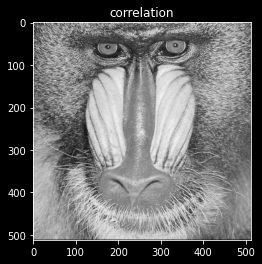

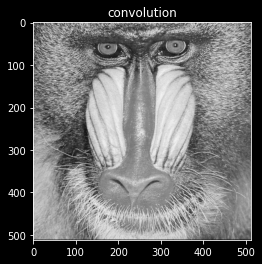

In [14]:
# symmetric kernel
output = correlation(img,kernel('unsharp_mask',3))
plt.imshow(output, cmap = 'gray')
plt.title("correlation")
plt.show()

output = convolution(img,kernel('unsharp_mask',3))
plt.imshow(output, cmap='gray')
plt.title("convolution")
plt.show()

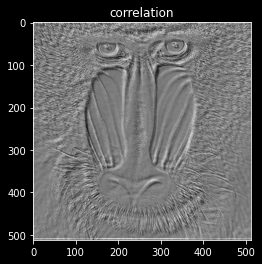

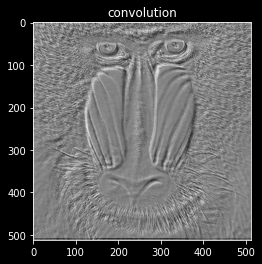

In [15]:
# asymmetric kernel

output_corr = correlation(img,kernel('asymmetric_example',7))
plt.imshow(output_corr, cmap = 'gray')
plt.title("correlation")
plt.show()

output_conv = convolution(img,kernel('asymmetric_example',7))
plt.imshow(output_conv, cmap='gray')
plt.title("convolution")
plt.show()

In the above example we can see the magnificent difference caused by an asymmetric kernel

In [16]:
np.linalg.norm(output_conv-output_corr)

27800.76182409396

In [17]:
pmf1 = normalised_histogram(output_corr)
pmf2 = normalised_histogram(output_conv)

JS_divergence(pmf1,pmf2)

0.02341256651695607

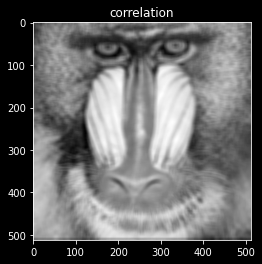

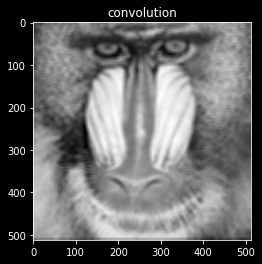

In [18]:
#box blur

output_corr = correlation(img,kernel('box_blur',11))
plt.imshow(output_corr, cmap = 'gray')
plt.title("correlation")
plt.show()

output_conv = convolution(img,kernel('box_blur',11))
plt.imshow(output_conv, cmap='gray')
plt.title("convolution")
plt.show()

Extracting 5 x 5 x 3 kernel from the image

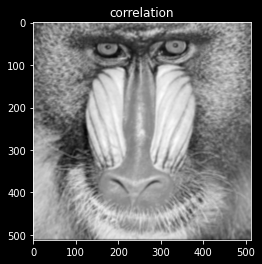

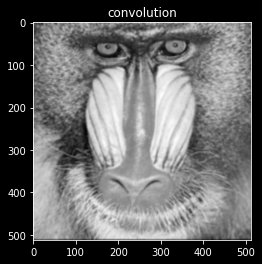

In [19]:
k = img[300:300+5,100:100+5,:]
output_corr = correlation(img,k)
plt.imshow(output_corr, cmap = 'gray')
plt.title("correlation")
plt.show()

output_conv = convolution(img,k)
plt.imshow(output_conv, cmap='gray')
plt.title("convolution")
plt.show()

In [20]:
np.linalg.norm(output_conv-output_corr)

3147.653411670351

In [21]:
pmf1 = normalised_histogram(output_corr)
pmf2 = normalised_histogram(output_conv)

JS_divergence(pmf1,pmf2)

0.0005633909607846818